In [66]:
#Importing Libraries

import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [7]:
#Extracting the dataset

import pandas as pd
df=pd.read_excel(r'C:\Users\shaik mahaboob basha\Downloads\Code Sheet - Customer Retenion.xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [8]:
#Shape of Data Set

df.shape

(269, 71)

In [9]:
# Dropping columns  pin code 
df.drop("4 What is the Pin Code of where you shop online from?", axis=1,inplace=True)

In [10]:
#Shape of Data Set after droping Pincodes

df.shape

(269, 70)

In [11]:
#Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 70 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [12]:
# check  Column types

Column_type = df.dtypes.reset_index()
Column_type.columns = ["Count", "Column Type"]
Column_type.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,45
1,object,25


In [13]:
#Checking Presence of NaN Values

df.isnull().values.any()

False

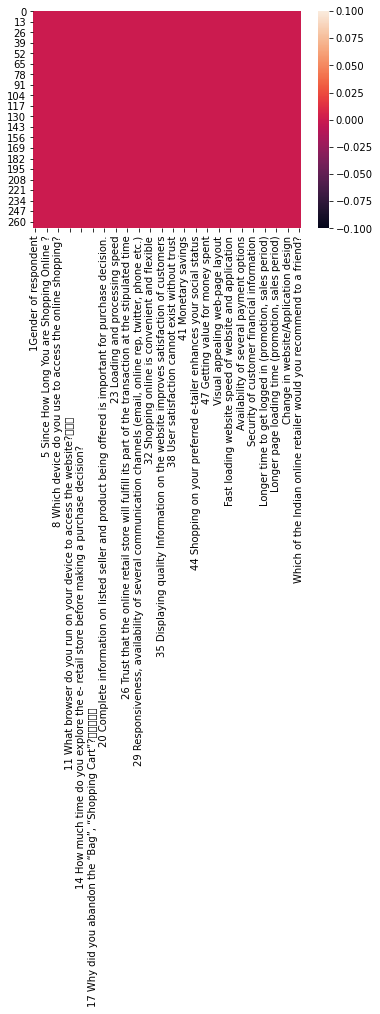

In [14]:
#Check Graphical Rep for Null Values

sb.heatmap(df.isnull())

In [15]:
#Describing the dataset

df.describe()

,1Gender of respondent,2 How old are you?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,1.360595,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,0.897805,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Correlation

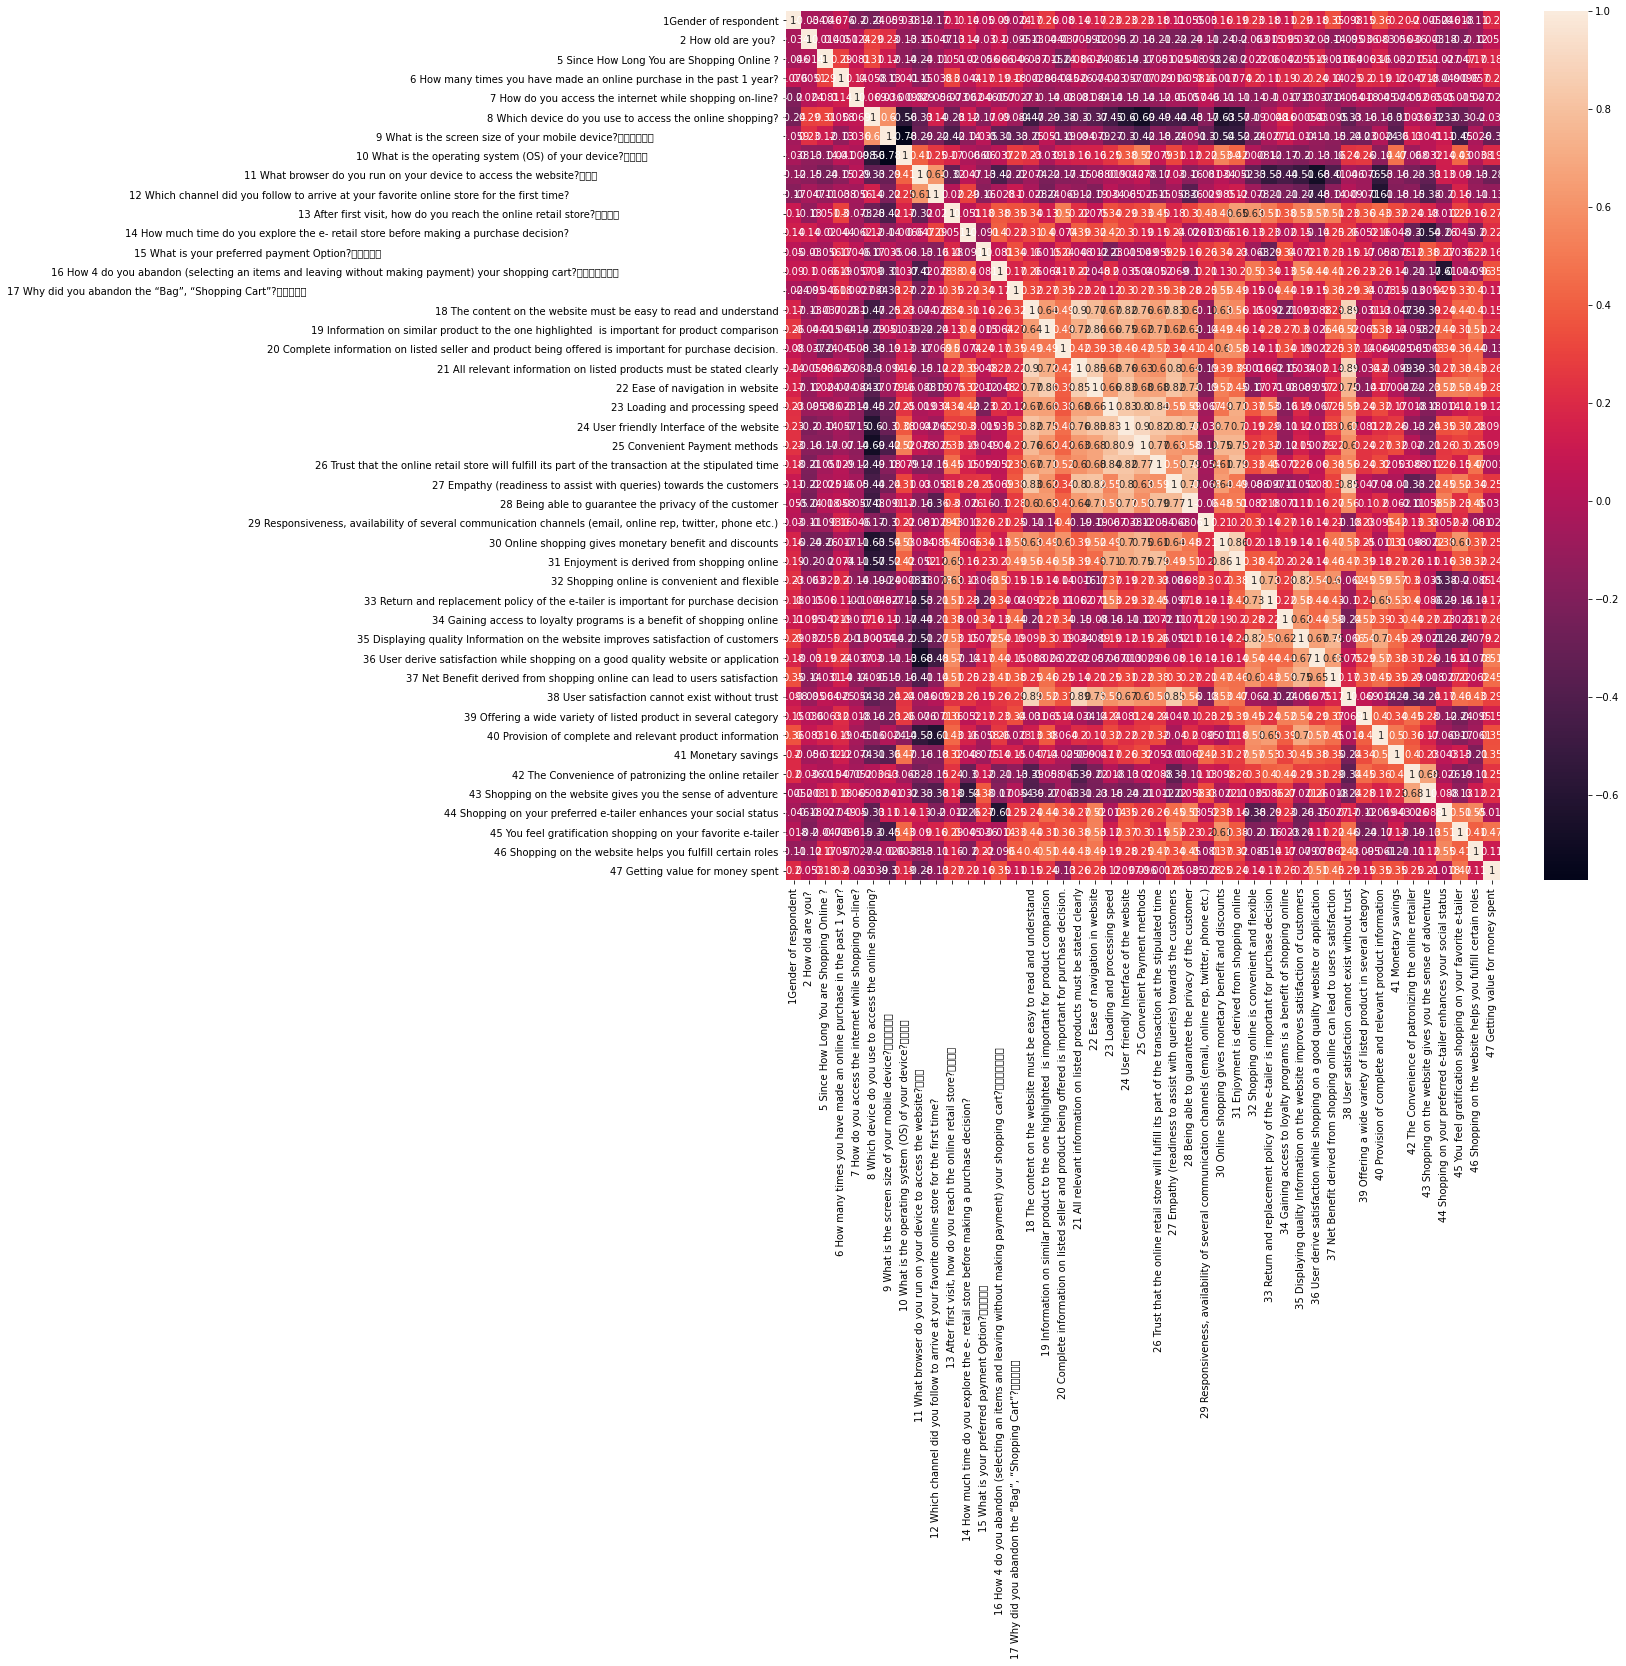

In [16]:
#Graphical Reprsentation of Correlation

corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sb.heatmap(corr_hmap,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101A6358>,
      dtype=object)

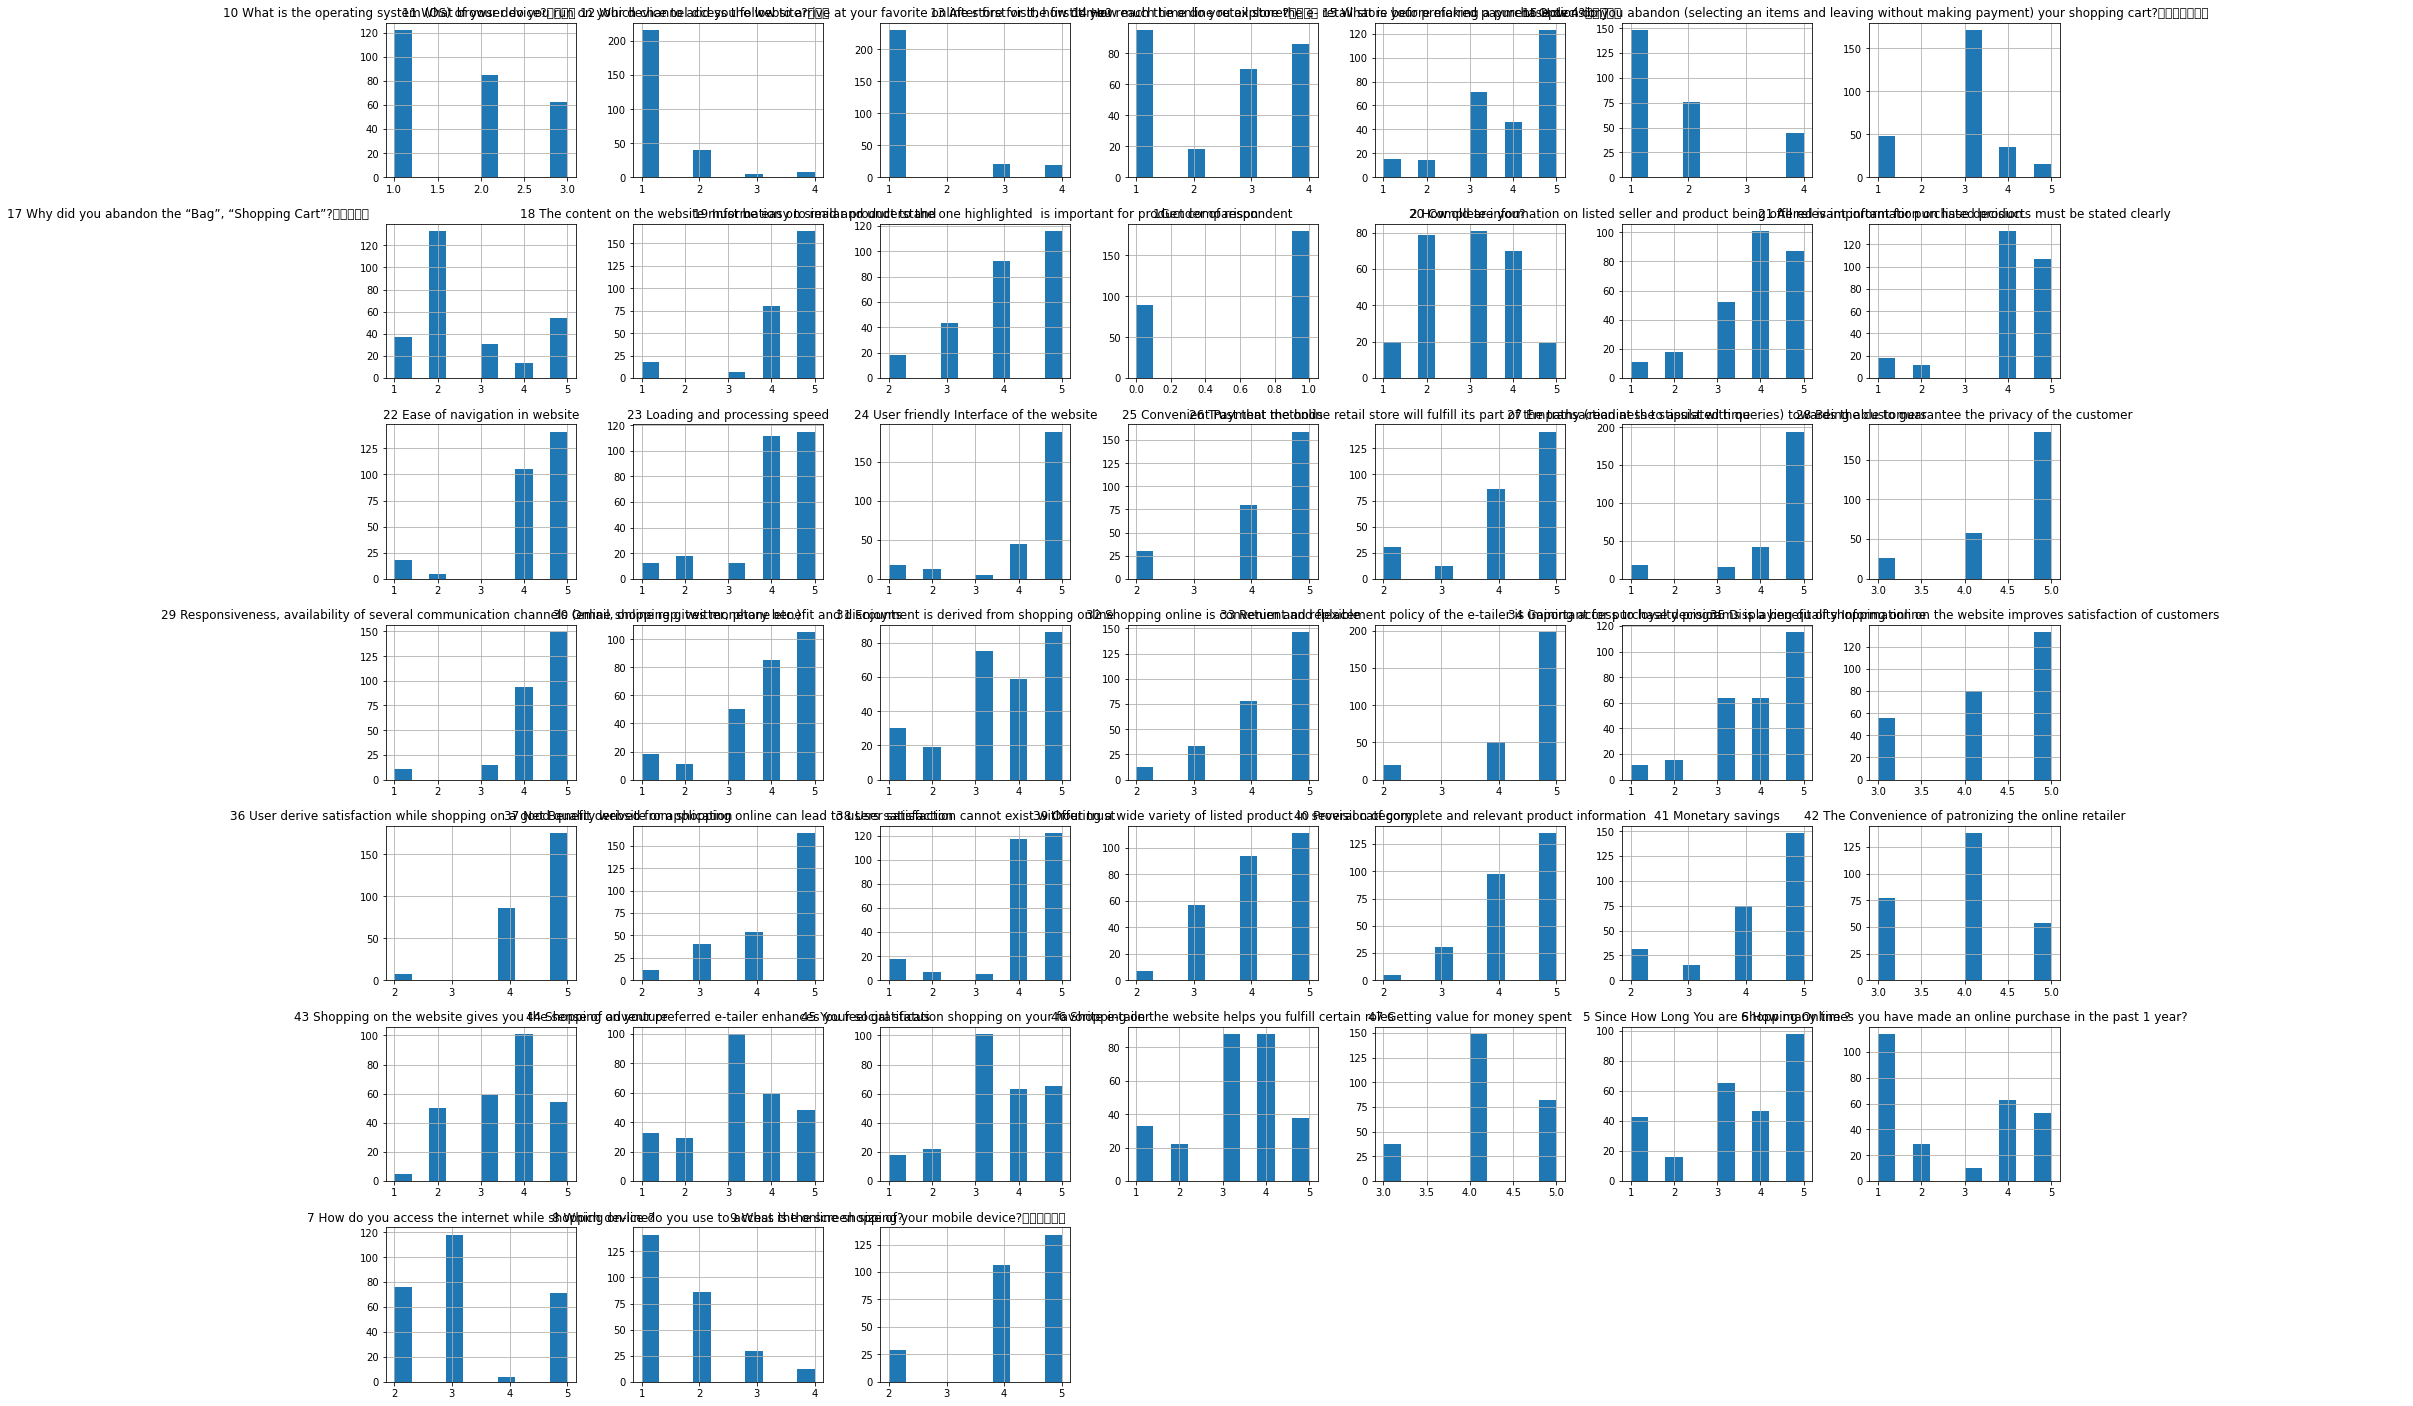

In [17]:
#Graphical Representation Of Histogram

df.hist(figsize=(30,25))

# Univariant Analysis

In [102]:
#Columns With Object Data Type

Column_Name = []

Column_Name = df.select_dtypes(include=['int64']).columns


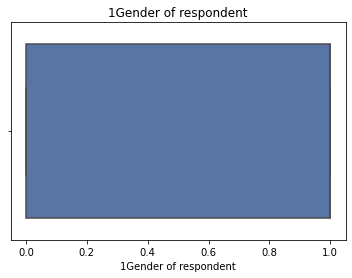

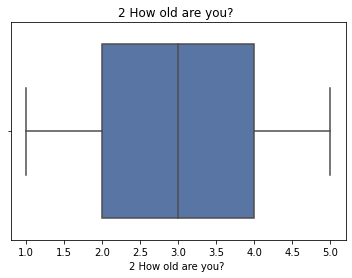

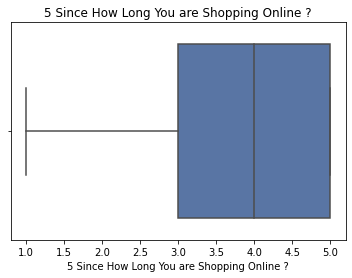

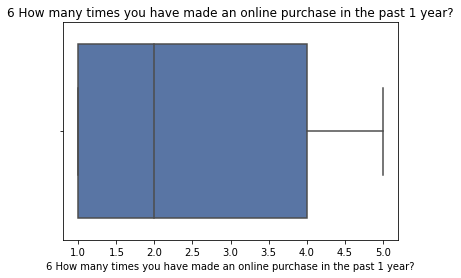

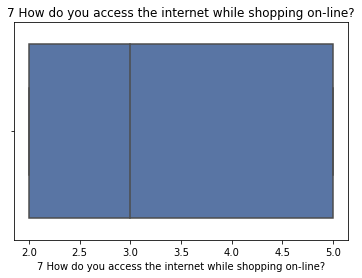

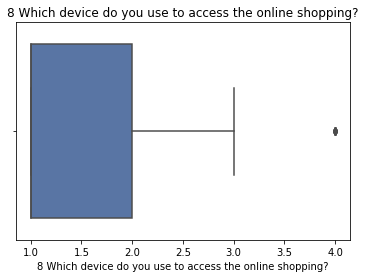

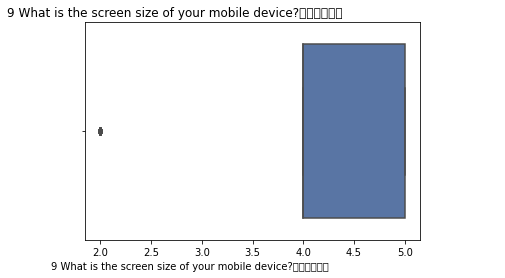

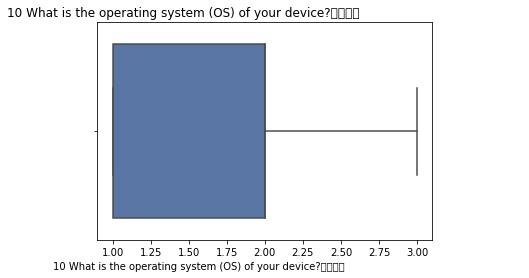

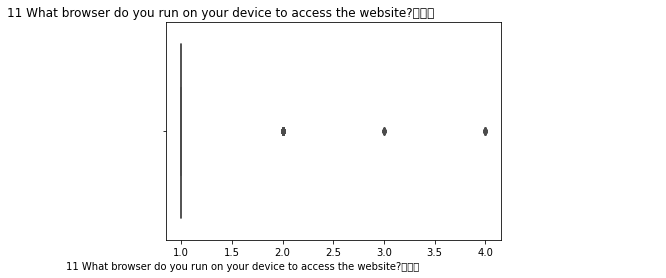

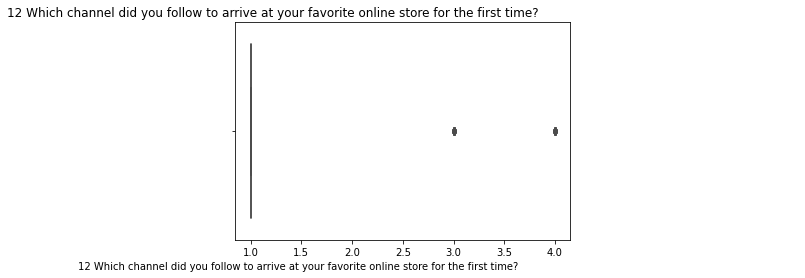

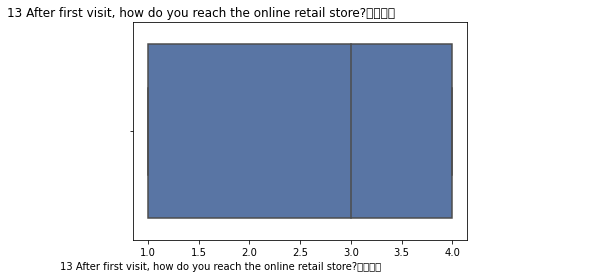

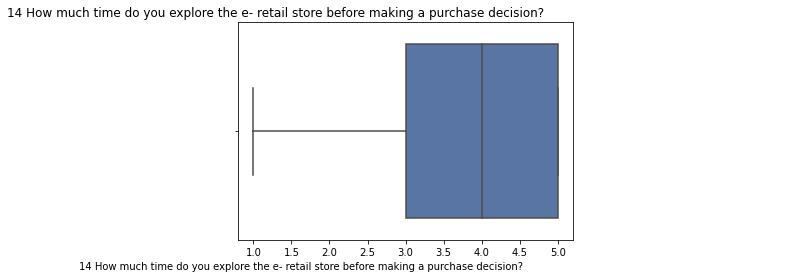

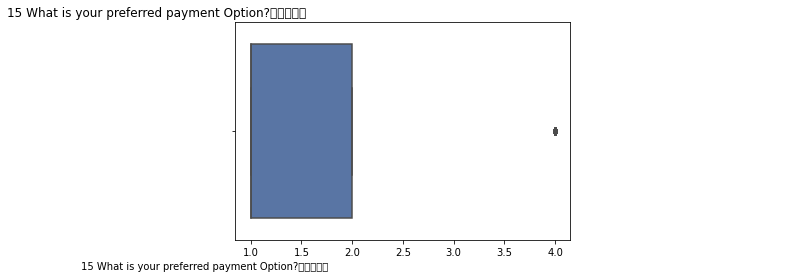

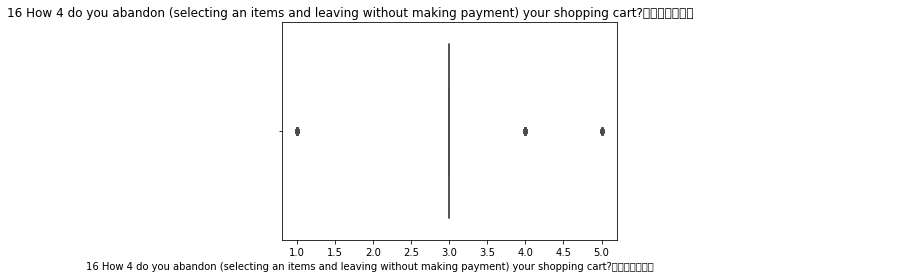

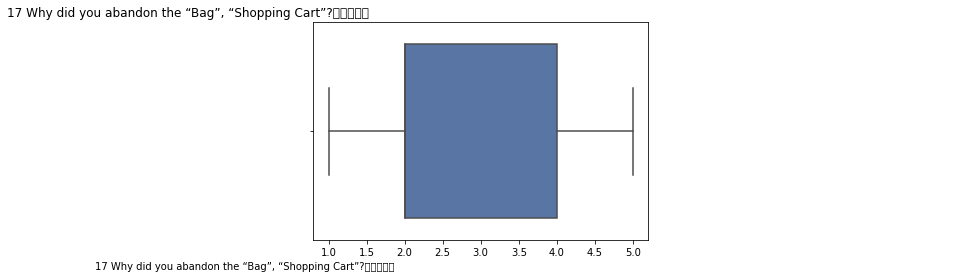

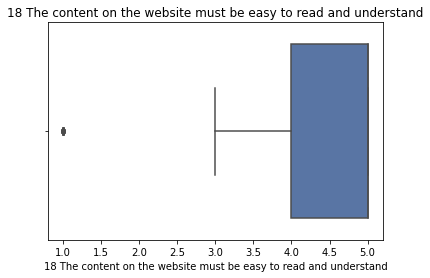

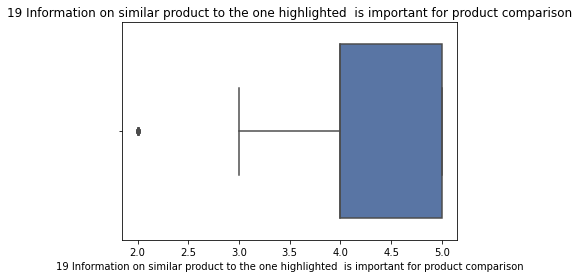

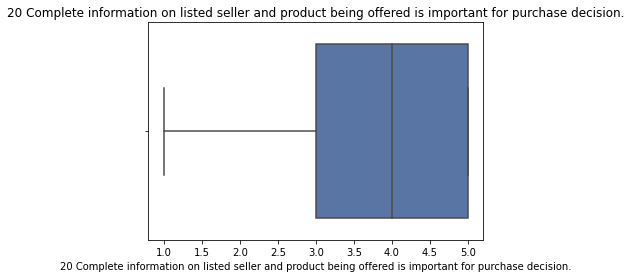

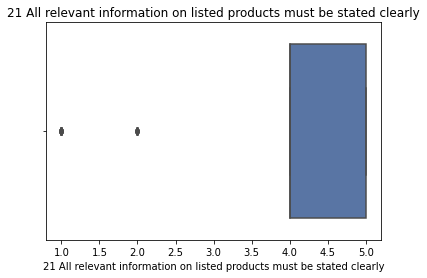

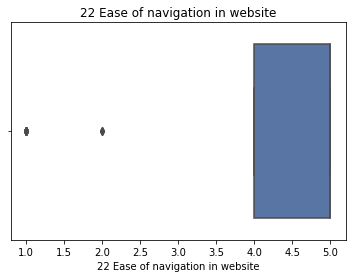

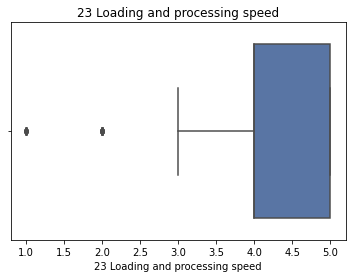

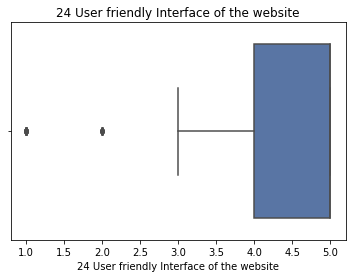

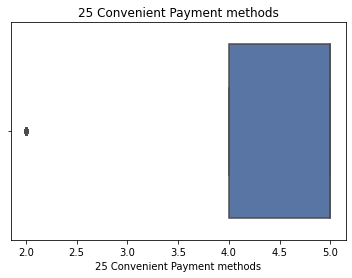

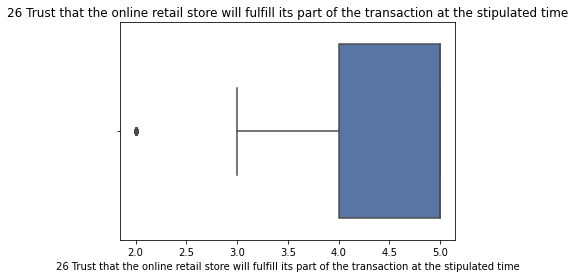

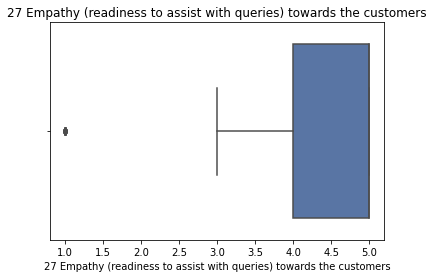

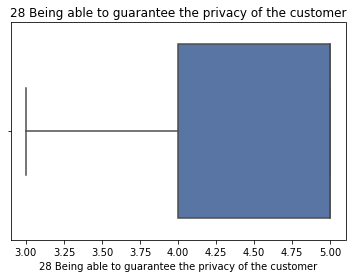

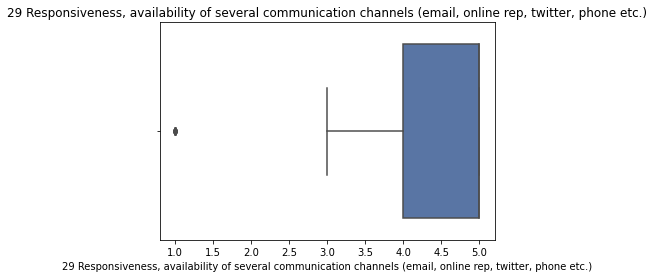

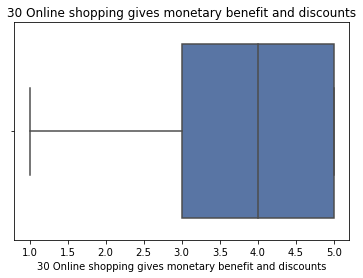

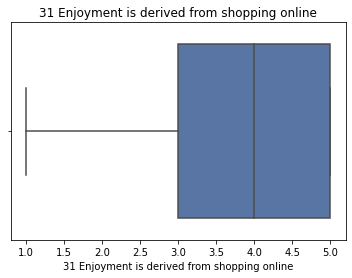

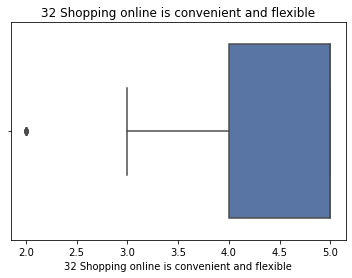

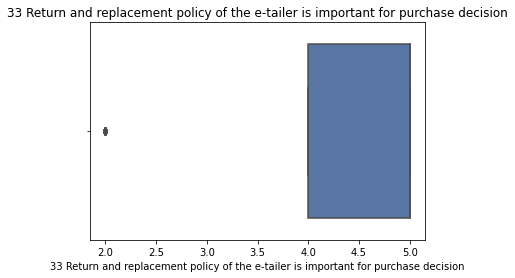

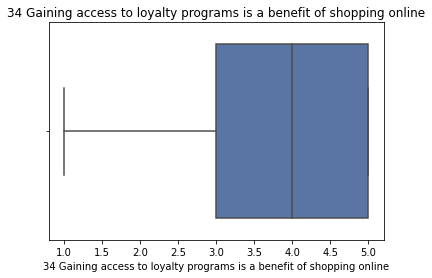

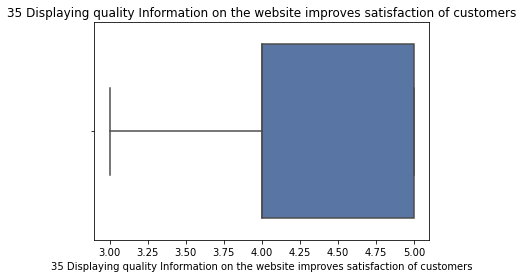

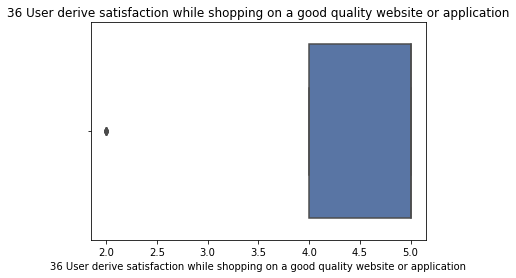

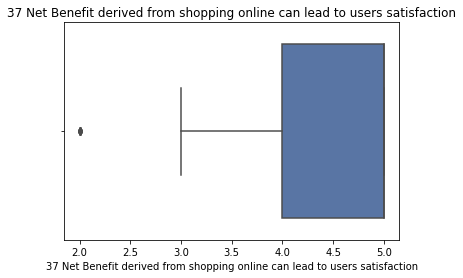

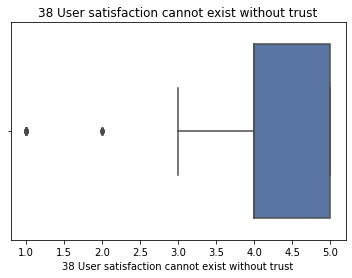

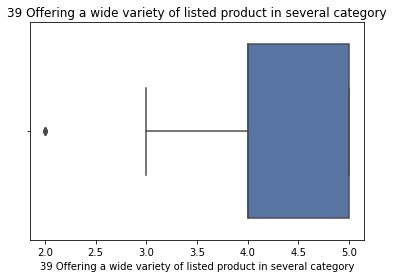

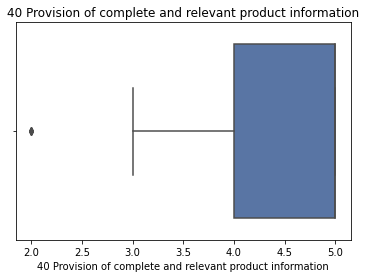

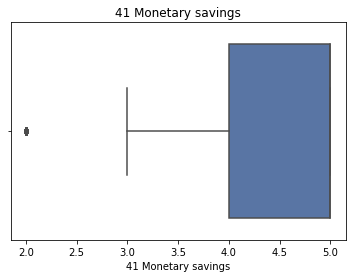

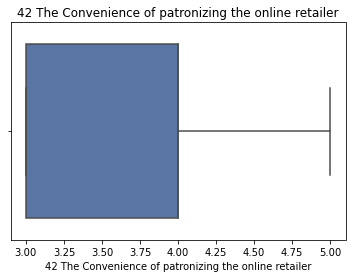

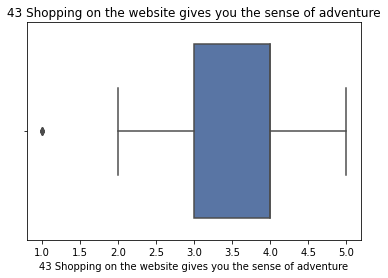

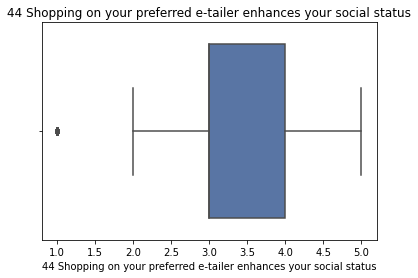

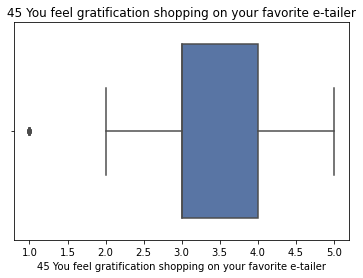

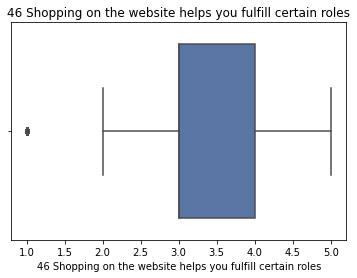

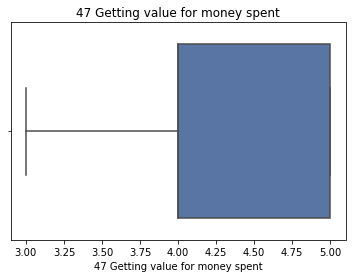

In [34]:
#Looping for Box Plot

for b in Column_Name:
    plt.figure()
    plt.clf()
    sb.boxplot(df[b],palette="deep")
    plt.title(b)
    plt.show()

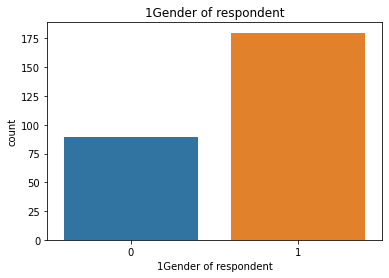

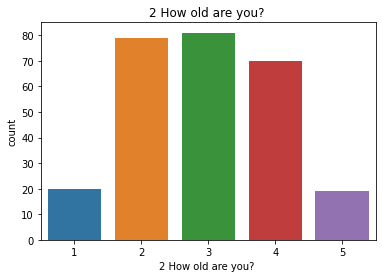

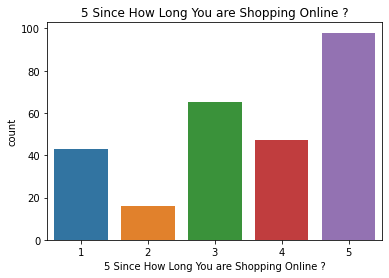

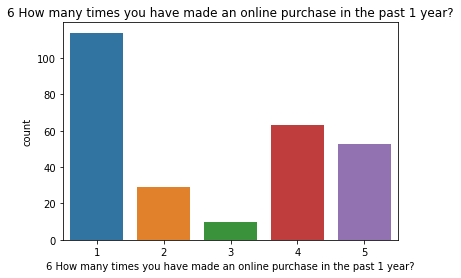

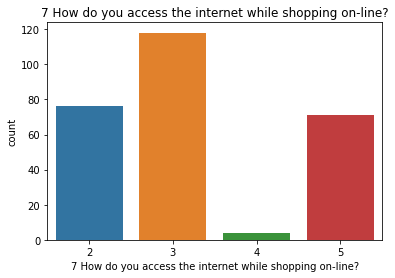

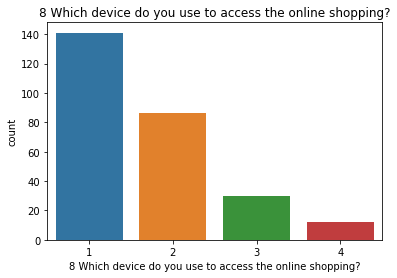

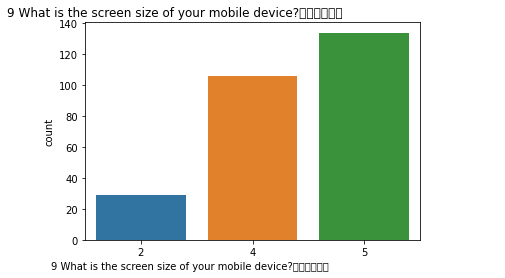

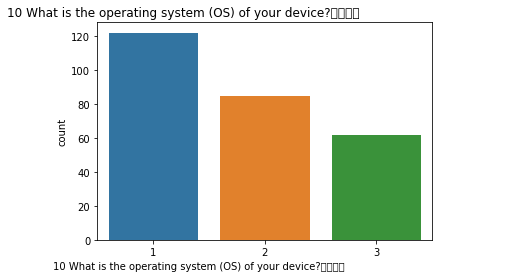

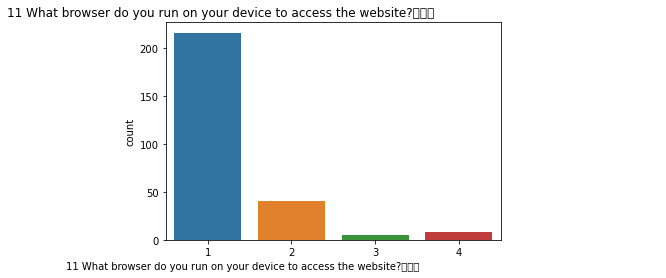

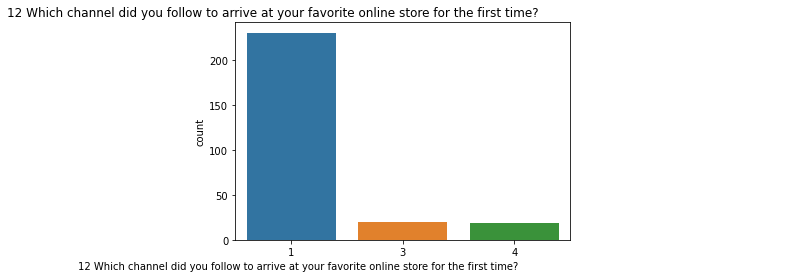

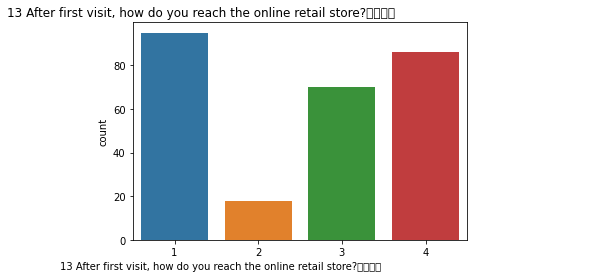

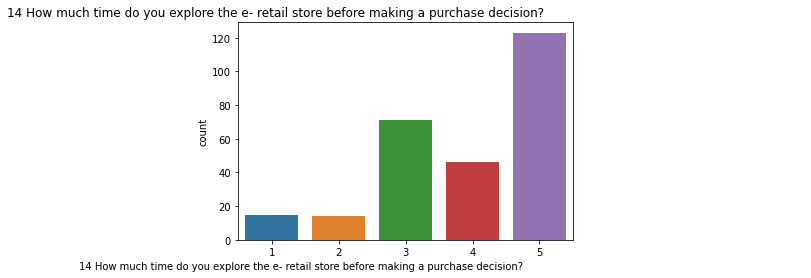

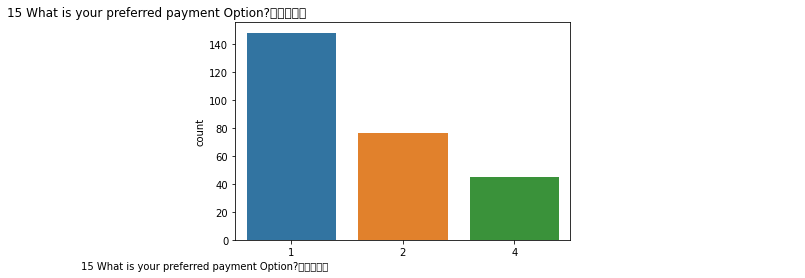

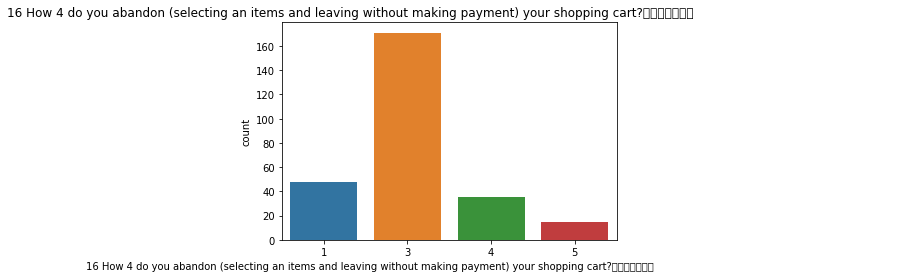

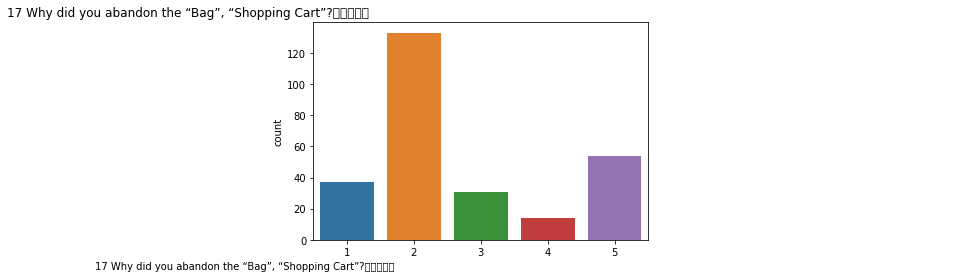

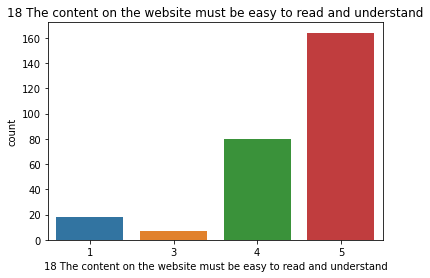

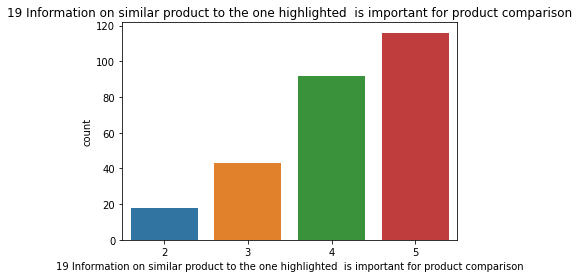

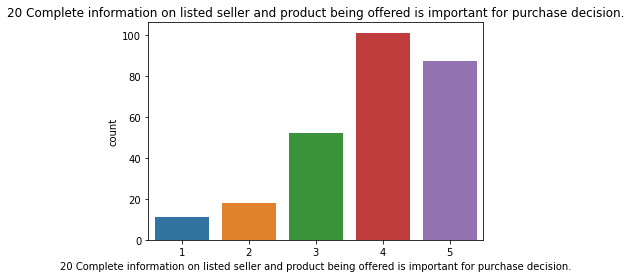

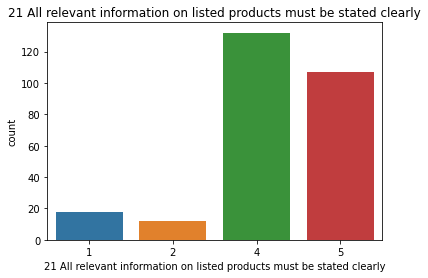

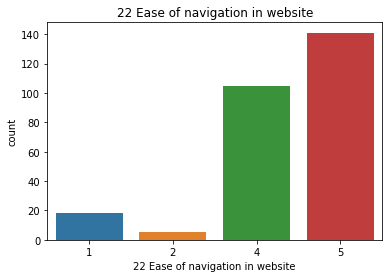

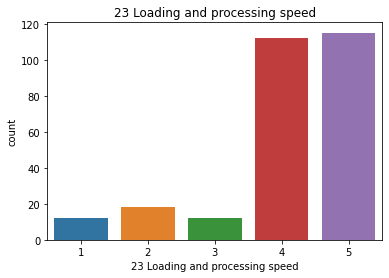

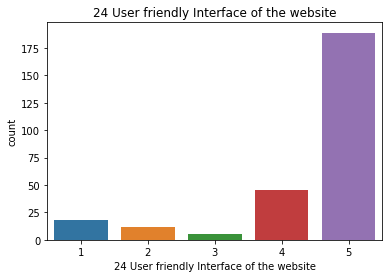

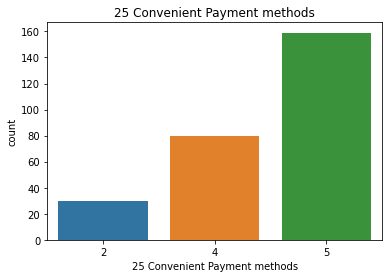

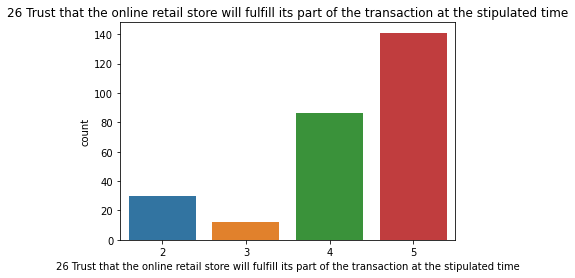

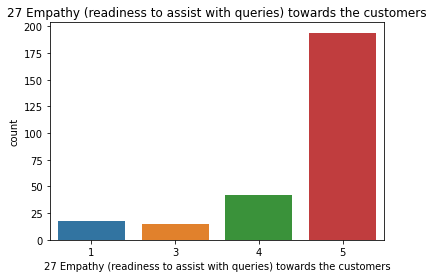

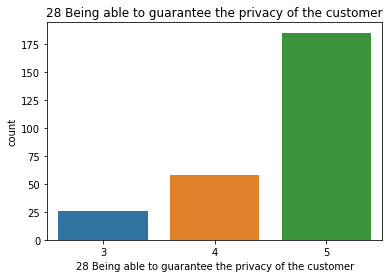

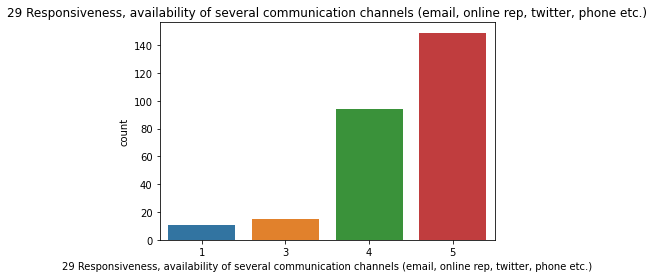

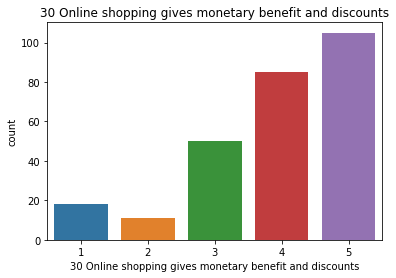

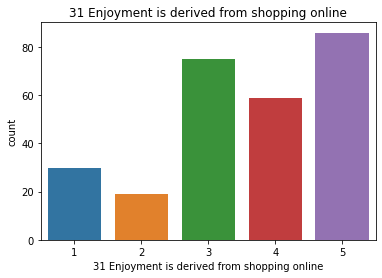

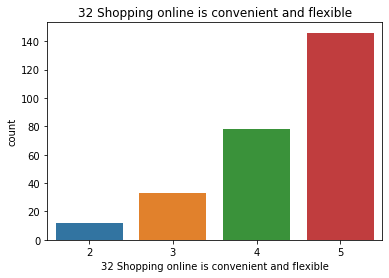

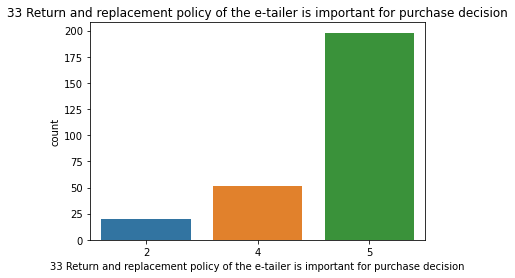

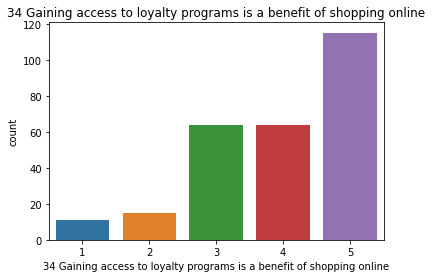

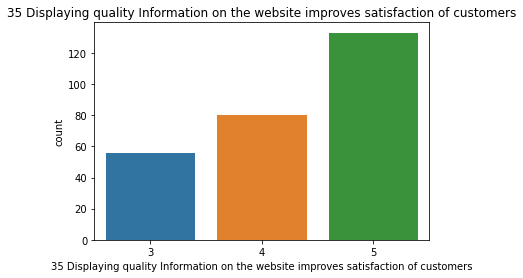

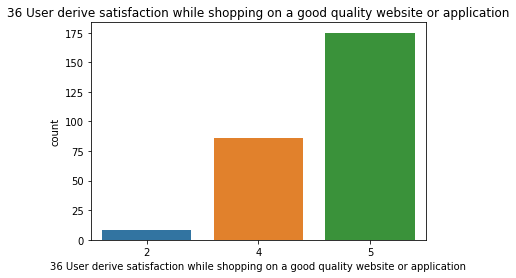

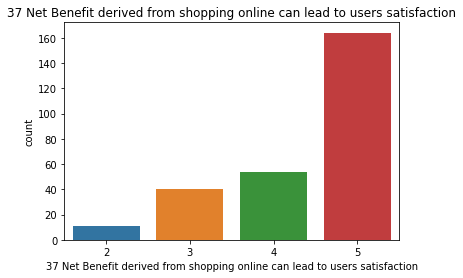

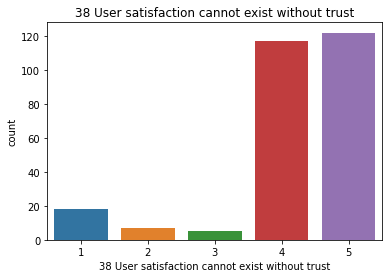

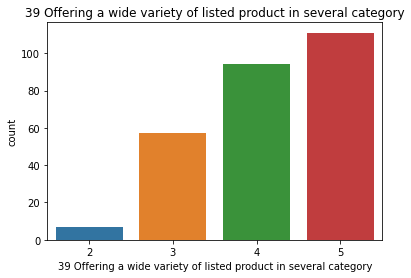

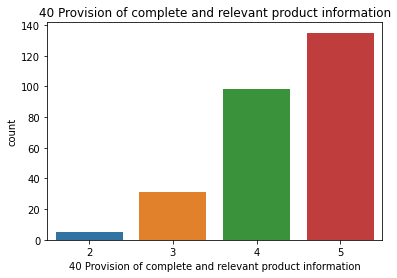

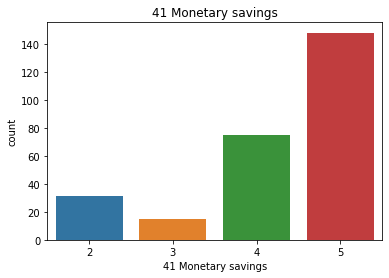

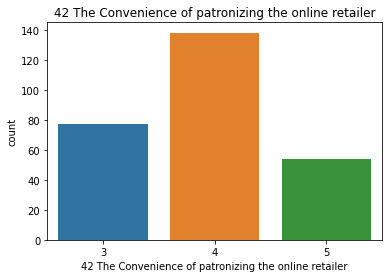

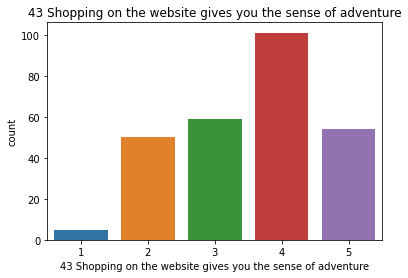

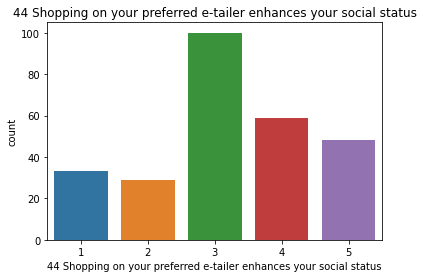

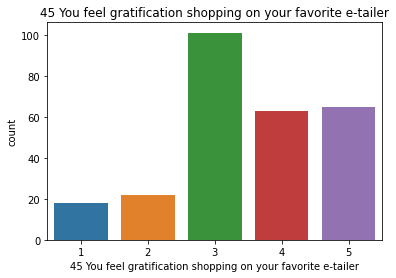

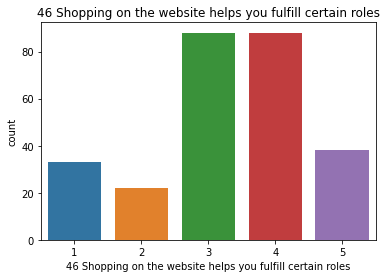

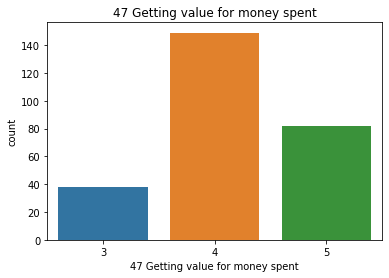

In [19]:
# Loping the Univariant Analysis

for i in Column_Name:
    plt.figure()
    plt.clf()
    sb.countplot(x = i,data=df)
    plt.title(i)
    plt.show()

# Bi Variant Analysis

In [20]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

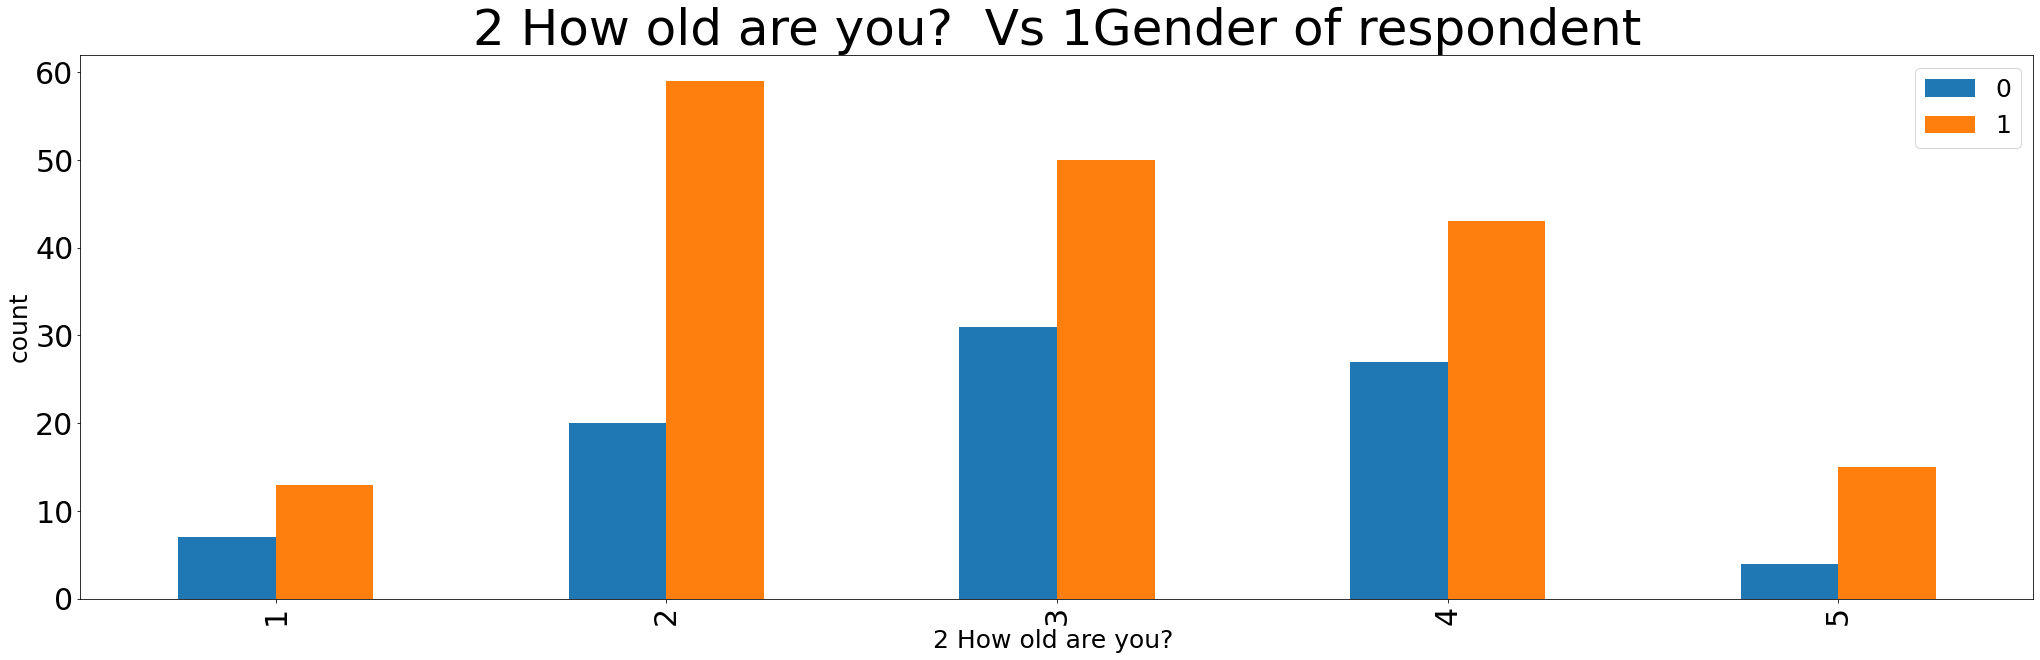

In [21]:
# Loping the Univariant Analysis


dis_bar('2 How old are you? ','1Gender of respondent')



Maxminum males users are between 31-40 Year old where as maximum females users age is in between 21-30 Years

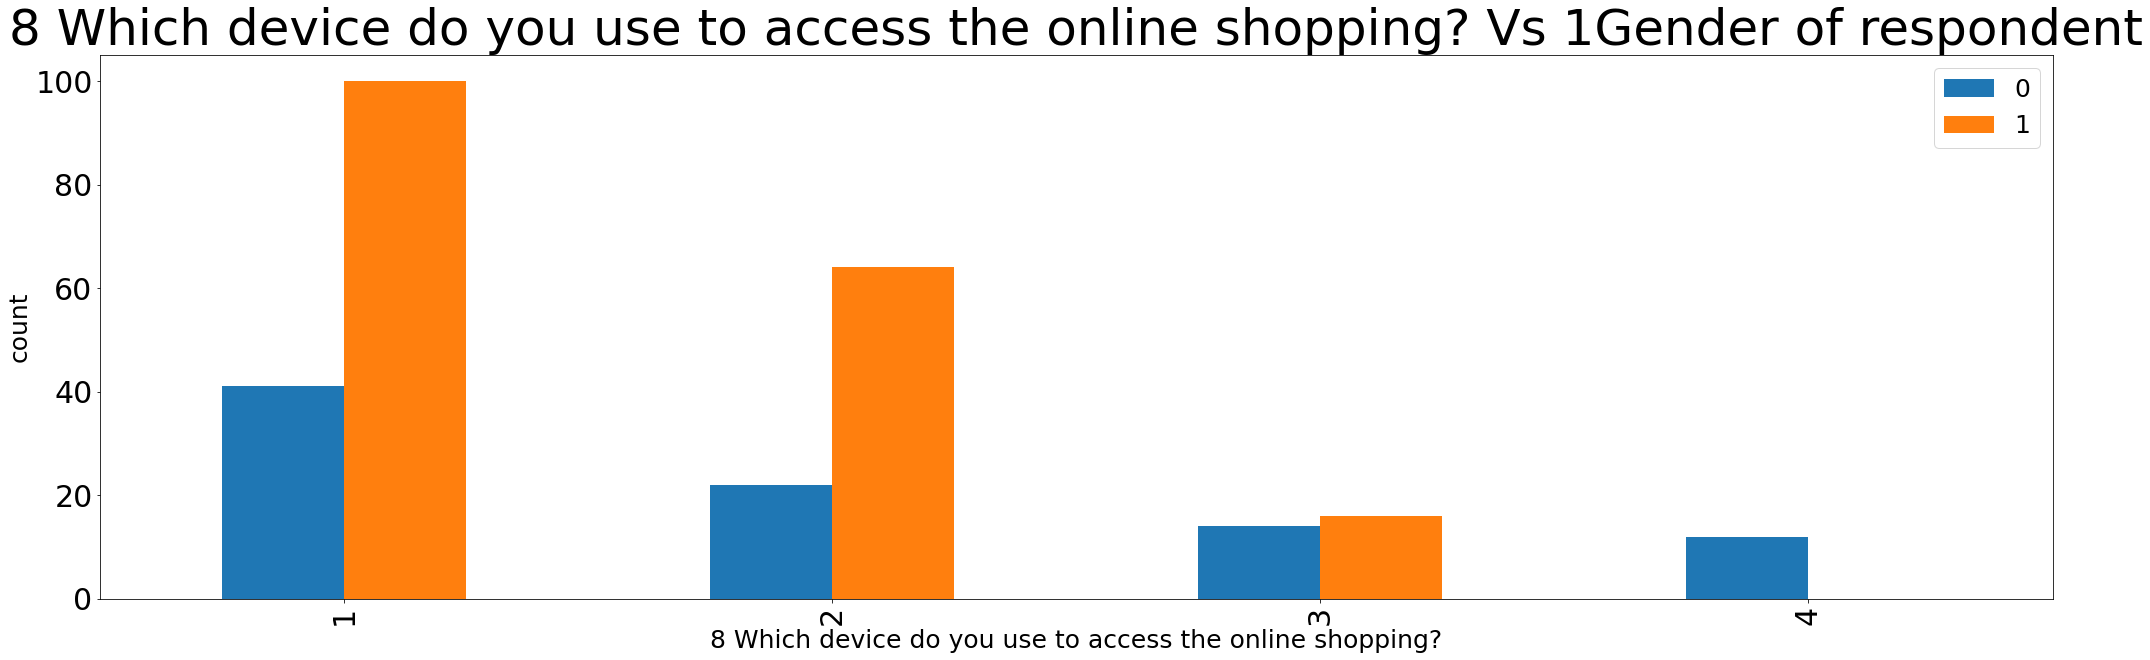

In [24]:
dis_bar('8 Which device do you use to access the online shopping?','1Gender of respondent')

Both Male and Females use Smartphones for accessing the online shopping

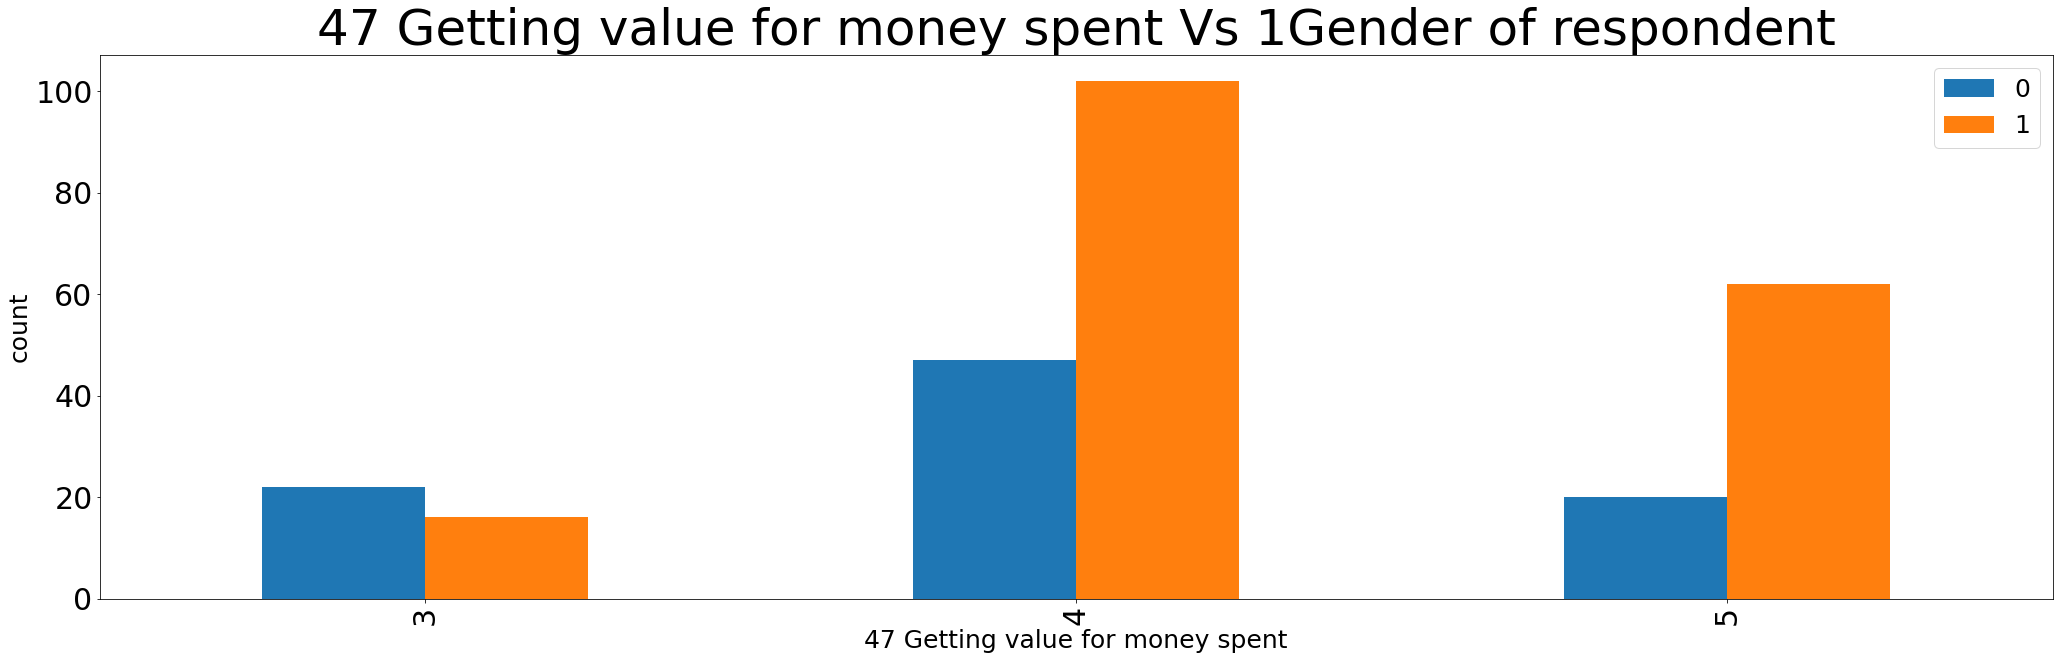

In [25]:
dis_bar('47 Getting value for money spent','1Gender of respondent')


In [ ]:
Both the genders agree that online shopping is Value for money

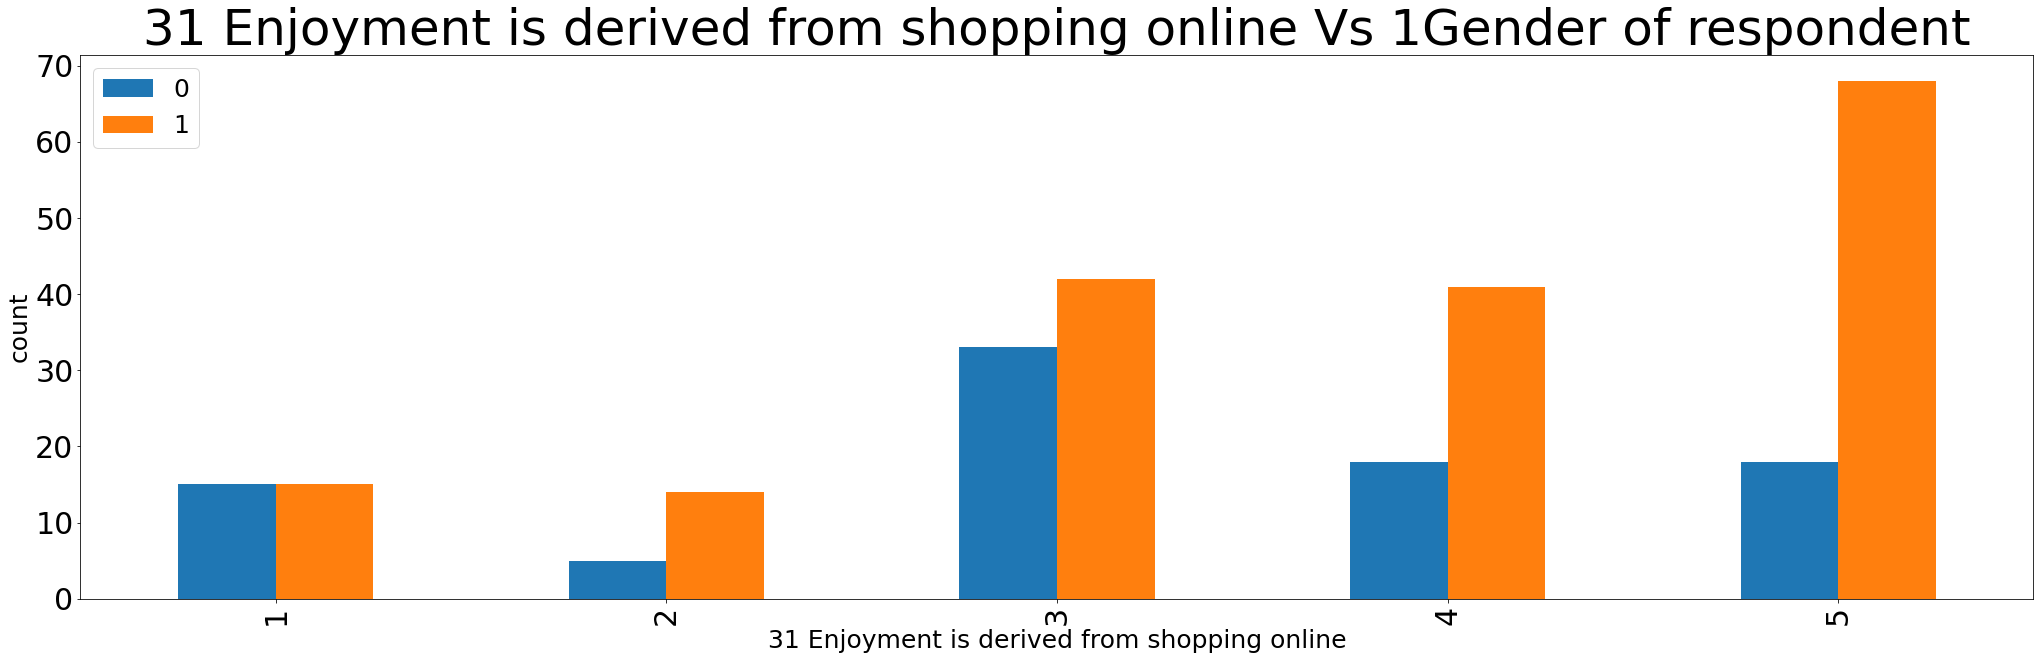

In [26]:
dis_bar('31 Enjoyment is derived from shopping online','1Gender of respondent')


Maximum Number of Males opted for indifference and most of the females feel that enjoyment is dervied from Shpping Online

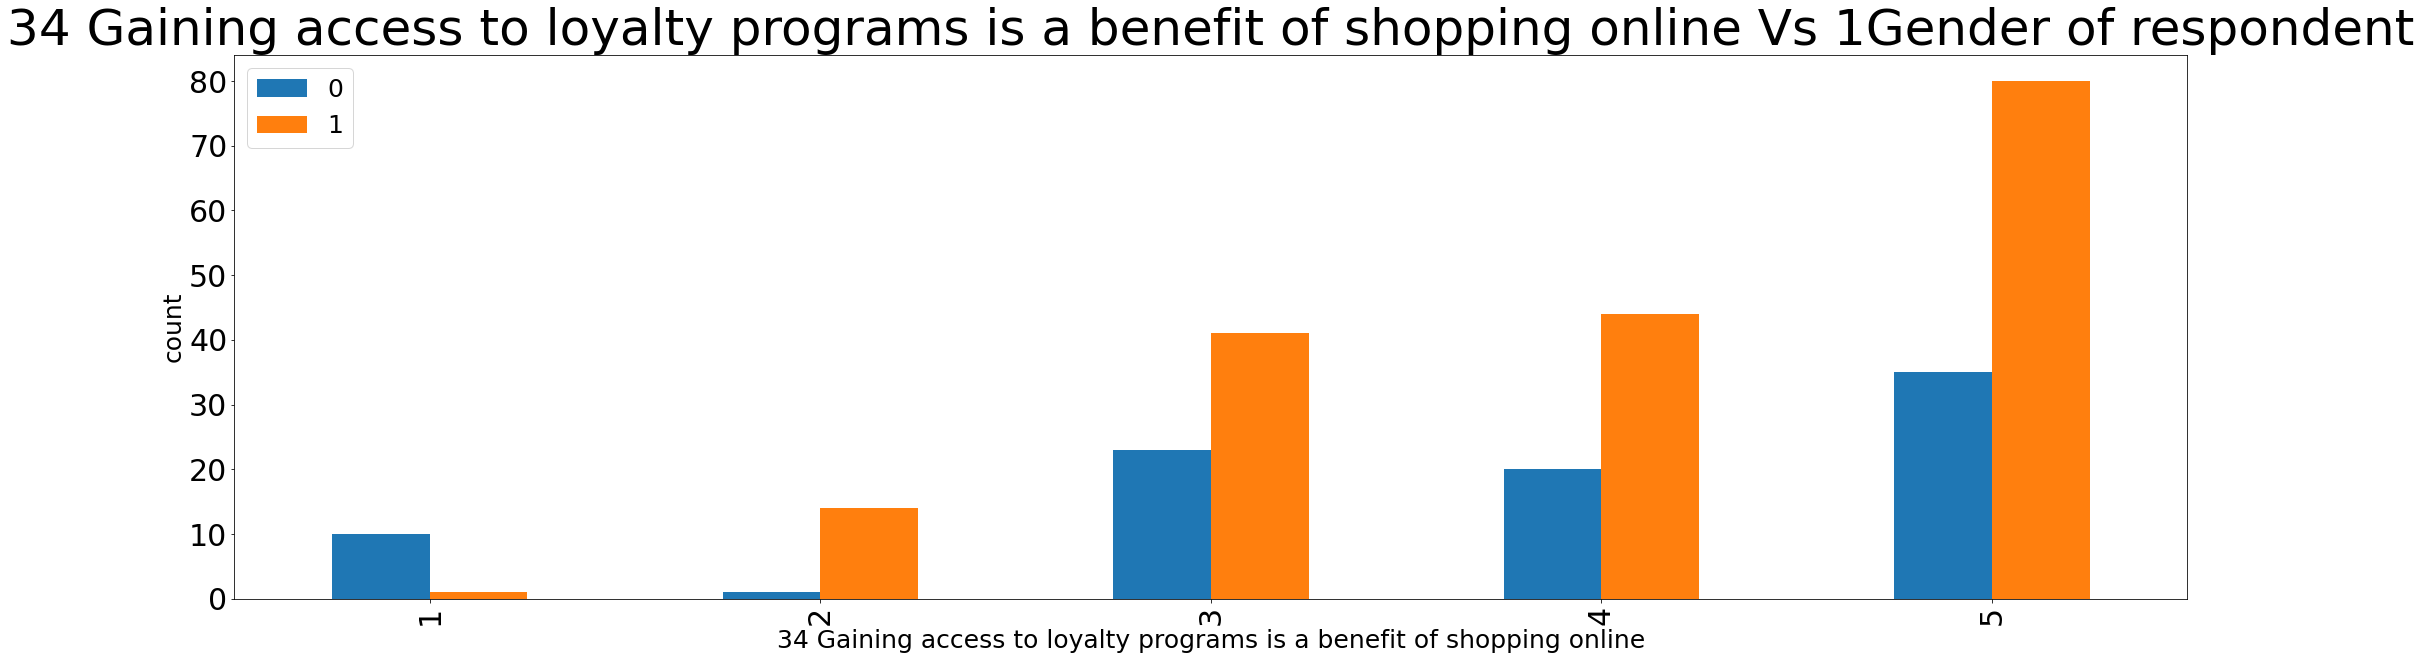

In [27]:
dis_bar('34 Gaining access to loyalty programs is a benefit of shopping online','1Gender of respondent')


Loyality programs attract both the genders to a larger extend.

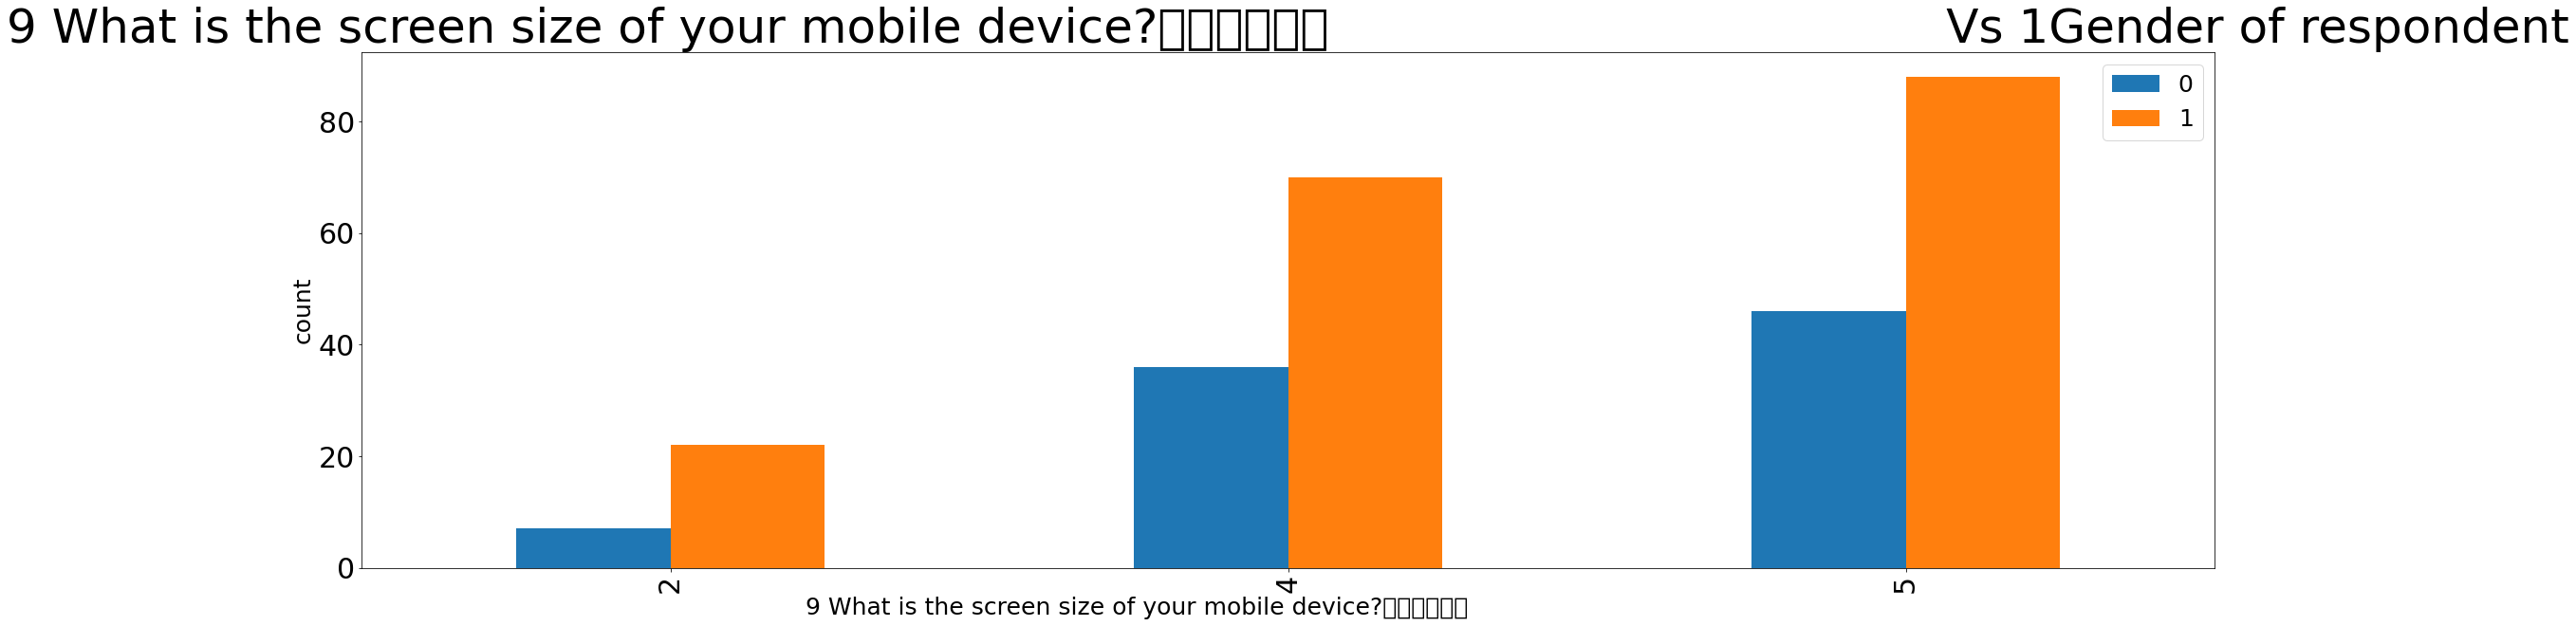

In [28]:
dis_bar('9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ','1Gender of respondent')


Screen Size is different for Maximum Females and Males while do online shopping

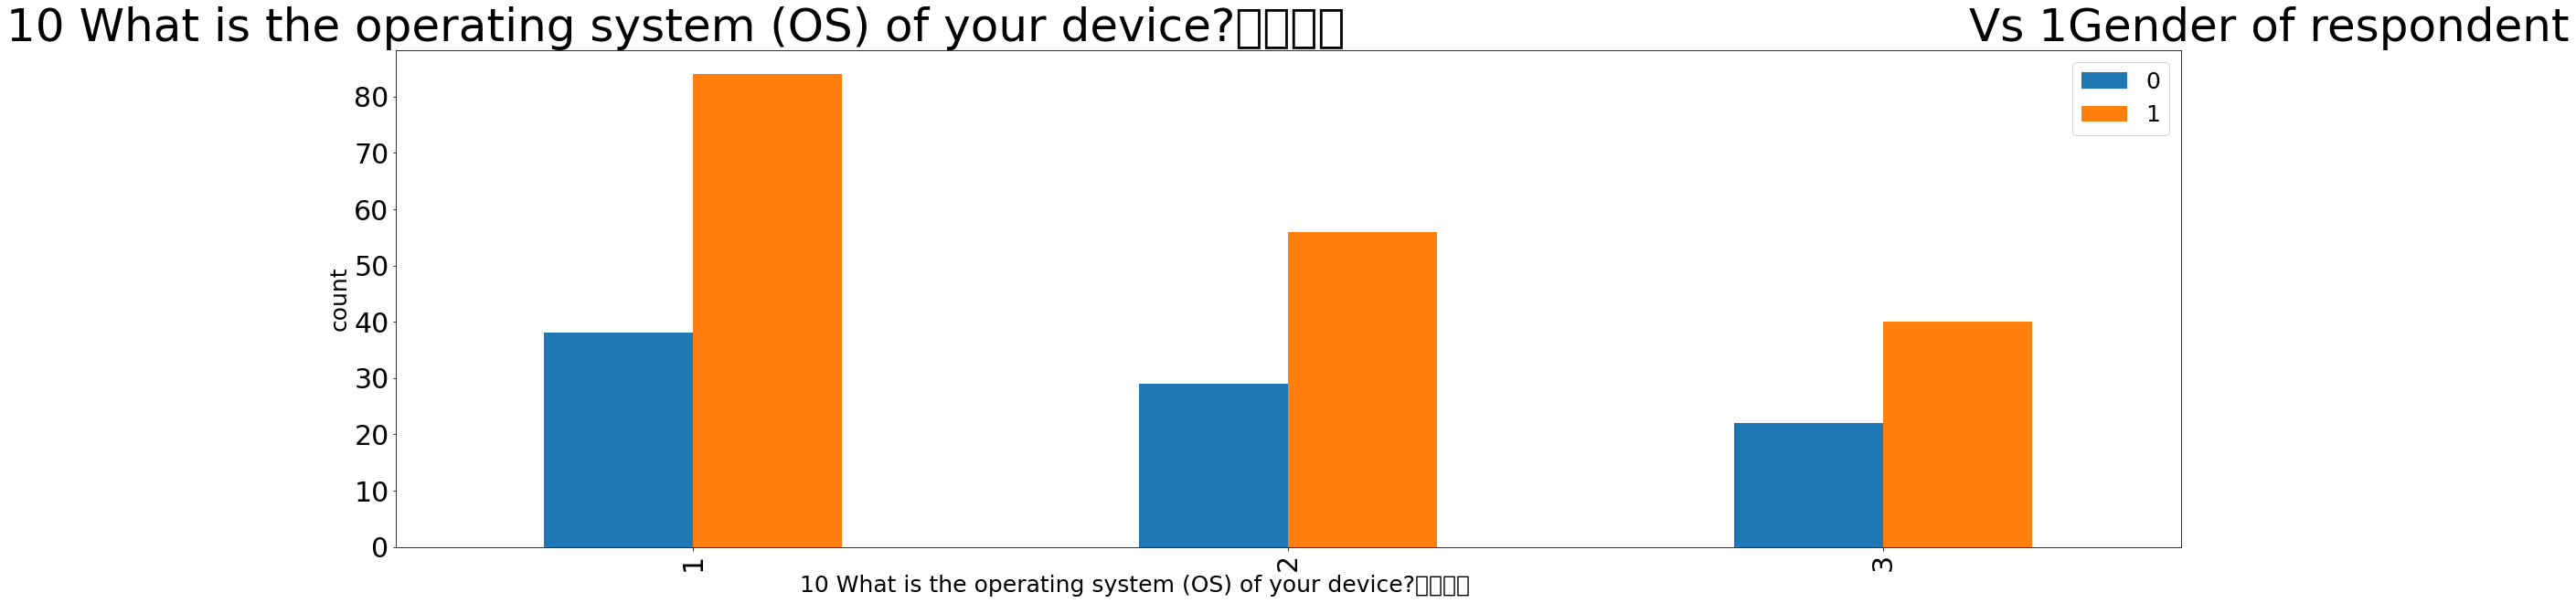

In [29]:
dis_bar('10 What is the operating system (OS) of your device?\t\t\t\t                                          ','1Gender of respondent')


Maximum prefer Windows / Windows Mobile for doing online shopping

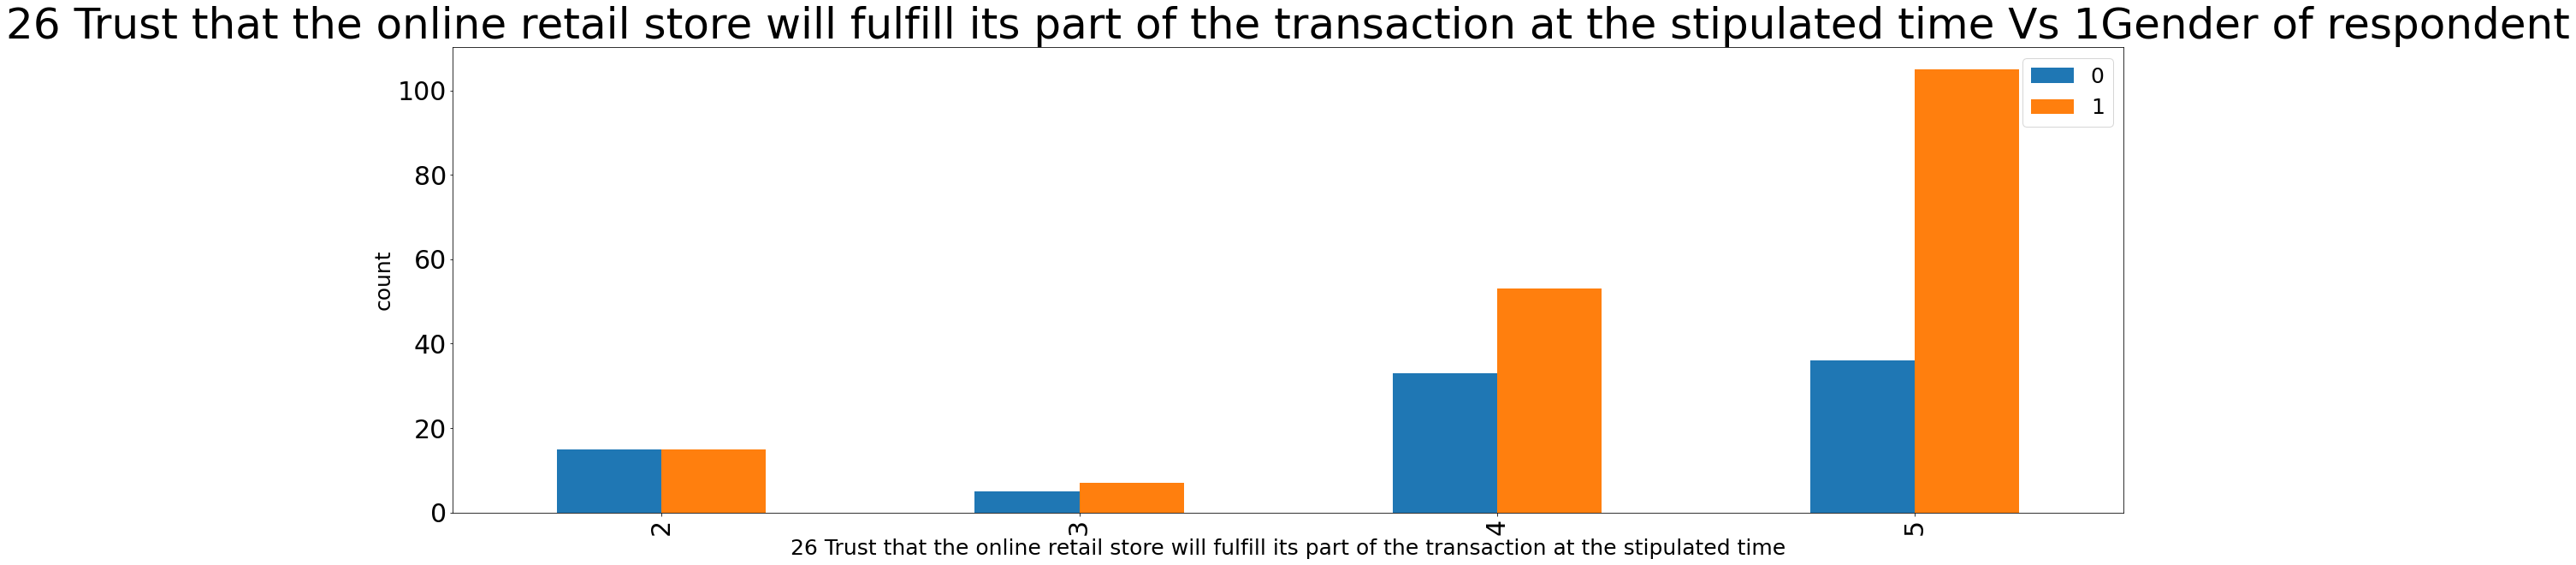

In [30]:
dis_bar('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time','1Gender of respondent')


Both genders trust that online retail store will fullfill its parts of transaction at stipulated time

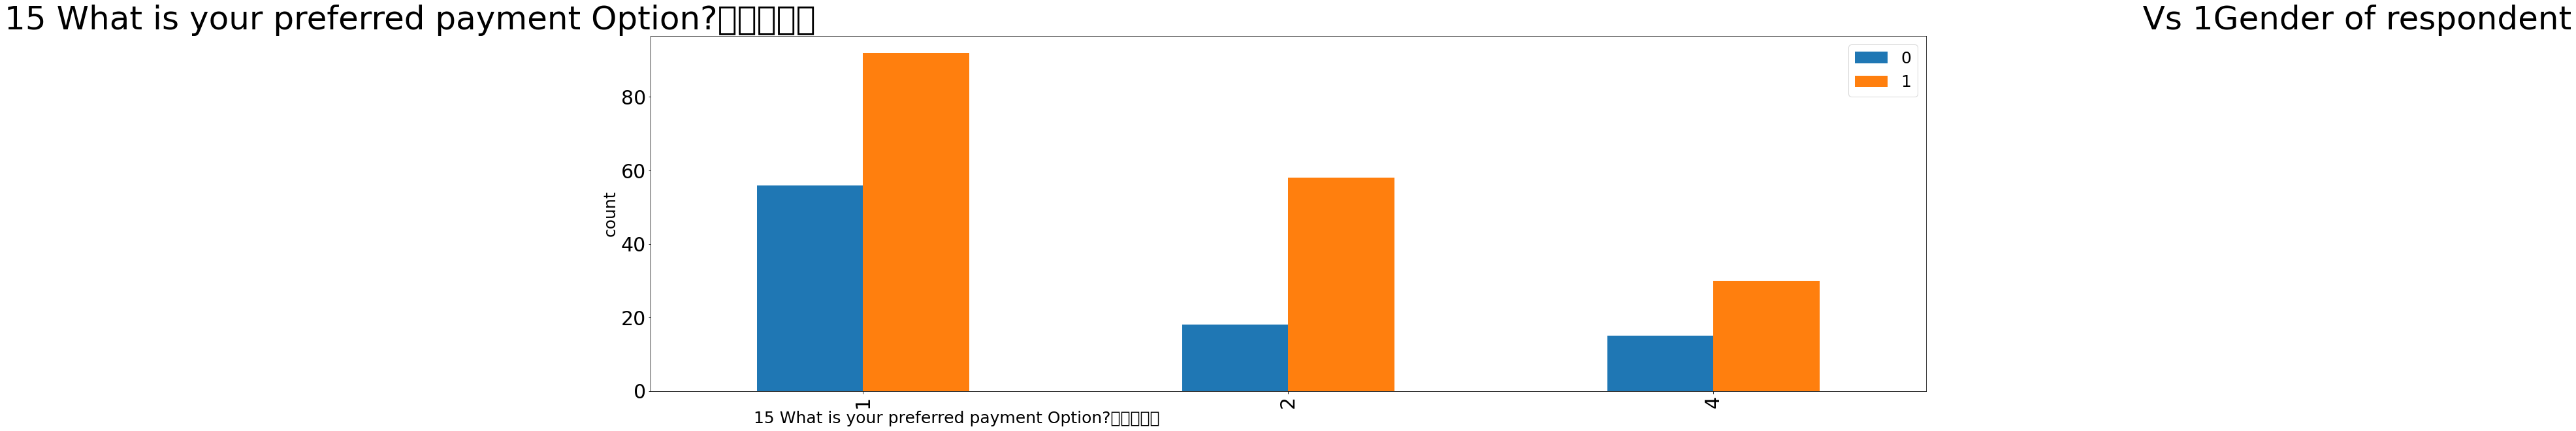

In [31]:
dis_bar('15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ','1Gender of respondent')


Credit / Debit Cards are widely used for online shopping by both male and female users

# Data Modeling

In [61]:
#Scaling the input Values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-0.80813635,  1.08734573,  1.40749001, ...,  1.42320626,
         1.47474151,  1.39214295],
       [-0.80813635,  0.39363851,  1.40749001, ..., -0.8267154 ,
        -0.34227525, -0.26150752],
       [-0.80813635,  0.39363851, -0.98468669, ...,  0.29824543,
        -0.34227525, -0.26150752],
       ...,
       [ 1.00175235, -0.3000687 , -0.98468669, ...,  0.29824543,
         0.56623313, -0.26150752],
       [-1.71308071, -0.3000687 , -0.98468669, ..., -0.8267154 ,
         0.56623313, -1.91515798],
       [ 1.00175235, -0.3000687 ,  0.80944584, ...,  1.42320626,
         1.47474151,  1.39214295]])

In [62]:
#Using Yeo - Johnson Method

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.78560281,  1.15007211,  1.25373506, ...,  1.38289953,
         1.54968792,  1.40692068],
       [-0.78560281,  0.33415514,  1.25373506, ..., -0.81128357,
        -0.39137212, -0.27497691],
       [-0.78560281,  0.33415514, -1.04614115, ...,  0.33675308,
        -0.39137212, -0.27497691],
       ...,
       [ 0.99910369, -0.40026011, -1.04614115, ...,  0.33675308,
         0.54392697, -0.27497691],
       [-1.83586706, -0.40026011, -1.04614115, ..., -0.81128357,
         0.54392697, -1.87945382],
       [ 0.99910369, -0.40026011,  0.91642803, ...,  1.38289953,
         1.54968792,  1.40692068]])

In [67]:
# Train and Test Datsset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
model=lg()
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred=model.predict(x_test)
print(pred)

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 0]


In [69]:
print ("Accuracy Score:",round(accuracy_score(y_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y_test,pred))

Accuracy Score: 0.84 

Confusion Matrix: 
 
 [[10  3]
 [ 4 26]] 

Classification Report: 
 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.90      0.87      0.88        30

    accuracy                           0.84        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.84      0.84      0.84        43



In [70]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print('Accuracy Score:',round(accuracy_score(y_test,predsvc),2),'\t')
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predsvc))
    print('\n','Classification Report:','\n','\n',classification_report(y_test,predsvc))

In [71]:
svmkernel("poly")

Accuracy Score: 0.88 	

 Confusion Matrix: 
 
 [[ 9  4]
 [ 1 29]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



As We Can Observe Accuracy Score is 88% - It Seems to be a good model but let check with other models as well

In [73]:
svmkernel("rbf")

Accuracy Score: 0.88 	

 Confusion Matrix: 
 
 [[ 9  4]
 [ 1 29]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



As We Can Observe Accuracy Score is 88% - It Seems to be a good model but let check with other models as well

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,preddtc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,preddtc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,preddtc))


Accuracy Score: 0.86 	

 Confusion Matrix: 
 
 [[11  2]
 [ 4 26]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.87      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.86      0.84        43
weighted avg       0.87      0.86      0.86        43



In [ ]:
As We Can Observe Accuracy Score of decision tree is 86% - It Seems to be a less efficient when compare with previous models.

In [77]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predknn),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predknn))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predknn))

Accuracy Score: 0.88 	

 Confusion Matrix: 
 
 [[ 9  4]
 [ 1 29]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



As We Can Observe Accuracy Score of KNN Classifier is 88% - It Seems to be a equal efficient when compare with SVC Classifier.

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predrfc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predrfc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predrfc))

Accuracy Score: 0.93 	

 Confusion Matrix: 
 
 [[11  2]
 [ 1 29]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.94      0.97      0.95        30

    accuracy                           0.93        43
   macro avg       0.93      0.91      0.92        43
weighted avg       0.93      0.93      0.93        43



In [ ]:
As We Can Observe Accuracy Score of Random Forest Classifier is 93% - It Seems to be a more efficient when compare with SVC, Decision Tree Classifier.

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predgbc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predgbc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predgbc))

Accuracy Score: 0.91 	

 Confusion Matrix: 
 
 [[11  2]
 [ 2 28]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.93      0.93      0.93        30

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43



As We Can Observe Accuracy Score of GradientBoostingClassifer is 91% - It Seems to be a next best efficient model after Random Forest Classifier.

In [84]:
#Check Test Data

import numpy as np
a=np.array(y_test)
a

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [85]:
#Checking the model performance by Train model and Test Data


df_com=pd.DataFrame({"Original":a,"Predicted":predrfc},index=range(len(a)))
df_com

,Original,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [104]:
#Saving the model

import pickle
filename='Customerretension.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [47]:
Col2 = [ '2 How old are you? ',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent']

In [105]:
# Assigning Values

x = df_new[Col2]

In [106]:
# Assigning Values


y = df_new.iloc[:,0]

In [50]:
#Shape of X and Y Variable

print (x.shape,'\t\t',y.shape)

(215, 44) 		 (215,)
